# Lecture 1: Review: Descriptive Statistics & Basic Python Coding (Completed version)
<img src="DescriptiveStat.jpg" alt="Descriptive Statistics" width="80%">

**Overview**

 You should be comfortable with basic Python coding and descriptive statistics. In this lecture, we will review these skills and apply them to synthetic data in econometrics contexts.

**In this lecture, we will:**
- Refresh core Python skills in data preprocessing (variables, lists, functions).

- Compute descriptive statistics (mean, median, variance, correlation).

- Visualize distributions and relationships (histogram, scatterplot).

---


## Part A — Before Coding... Let's Think! 🧠

Before we start writing Python code, let’s **understand the basics** behind descriptive statistics.

<hr style="border: 1px dotted #bbb;">

### A1. What is Descriptive Statistics?

Descriptive statistics are **numbers** (or a **set of numbers**) that **summarize and describe** the main features of a dataset.  

Think of them as a **quick snapshot** of your data — they **tell the story** before we dive into deeper analysis.

**Some key aspects:**

- **Central Tendency** → Where the data is centered → *(e.g. mean, median, mode)*
- **Dispersion** → How spread out the data is → *(e.g. variance, standard deviation, range)*
- **Relationships** → How variables move together → *(e.g. correlation, covariance)*

<hr style="border: 1px dotted #bbb;">

### A2. Why Are Descriptive Statistics Important?

Descriptive statistics are **always the first step** in data analysis because they help you:

- Understand the **basic patterns** in your data.
- Detect **outliers, anomalies, or missing values**.
- See the **overall shape** of your dataset.
- Prepare for deeper **statistical analysis and modeling**.


<hr style="border: 1px dotted #bbb;">

📺
[Prof. Bing Wen Brunton - Asking and Answering Questions with Data through Plots](https://www.youtube.com/watch?v=b_TIPozKAcg)

<hr style="border: 1px dotted #bbb;">


### **Key Takeaway** ✅  
Before estimating regressions or running econometric models,  **start with descriptive statistics** — they give you the **foundation** for better insights.

---

## Part B -  Now, Let's code!
In today's lab, we will start by warming up with some basic Python coding skills. 

Then, we will create a synthetic dataset that mimics real-world economic data. 

Finally, we will compute and visualize descriptive statistics to understand the data better.

<hr style="border: 1px dotted #bbb;">


### Part B1 - Warming up: Basic Python Coding Refresher 

#### **1. Variables & Data Types**


In [1]:
# Basic data types in Python
x = 10          # Integer: whole number
y = 3.14        # Float: decimal number
name = "Ka Yan"  # String: text
is_a_good_student = True  # Boolean: True or False

#### **2. Lists & Indexing**

In [2]:
# Lists: **ordered** collections of items

numbers = [1, 2, 3, 4, 5]  # Create a list, and assign it to a variable (called `numbers` in this case)
first_number = numbers[0]  # Access first element **Using 0-based indexing**


# Do some list operations
numbers.append(6)          # Add an element to the end of the list
print("The list now is:", numbers)
numbers.remove(1)          # Remove an element from the list
print("The list now is:", numbers)
numbers[0] = 100           # Modify an element in the list 
print("The list now is:", numbers)

# Note that after **each** operation, the content of the list `numbers` changes.

The list now is: [1, 2, 3, 4, 5, 6]
The list now is: [2, 3, 4, 5, 6]
The list now is: [100, 3, 4, 5, 6]


#### **3. Functions** 

In [3]:
# Functions: reusable blocks of code that perform a specific task

# Define the function
def add(a, b):
    return a - b

# Call the function and store the result
result = add(5, 3)  # result is 8

# Display the result
result

# Is it really 8? Let's print it out to check!
print("The result is:", result)

The result is: 2


In [4]:
# Oops! The function is supposed to add two numbers, but it subtracts them instead. Let's fix it.
def add(a, b):
    return a + b

# Call the function again and store the result
result = add(5, 3)  # result is now 8

# Display the result
print("The result is:", result)

The result is: 8


#### **4. If Statements & Loops**

In [5]:
# Control Flow: if-elif-else statements

# Try different nymbers here
test_score = 100
test_score = 85
test_score = 45

# if-elif-else statement (Disclaimer: this is just an example, not a real grading scheme of this class :P)
if test_score >= 90:
    grade = 'A'
elif test_score >= 80:
    grade = 'B'
elif test_score >= 70:
    grade = 'C'
elif test_score >= 60:
    grade = 'D'
else:
    grade = 'F'
print("The grade is:", grade)

The grade is: F


In [6]:
# Control Flow: For loops

for_loop_go_through_list = [1, 2, 3, 4, 5]  # A list to demonstrate for loop

for num in for_loop_go_through_list:
    print(num)  # Print each number in the list 

1
2
3
4
5


In [7]:
# Control Flow: While loops

count = 0

while count < 5:
    print(count)
    count += 1  # Increment count by 1 (equivalent to count = count + 1)

0
1
2
3
4


<hr style="border: 1px dotted #bbb;">

### Part B2 - Descriptive Statistics of Synthetic Data in Econometrics Contexts

#### **Step 0: 📦 Let's Install the Required Libraries Together**

We will use four main Python libraries in this lecture:  **NumPy**, **Pandas**, **Matplotlib**, and **Seaborn**.

> 💡 **Tip:** In Jupyter notebooks, use **`%pip`** instead of `pip` to install packages.


In [8]:
# Let's install and import the required libraries together!
%pip install numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### **Step 1: Create a Synthetic Econometrics-Style Dataset**

Let's generate a synthetic dataset for **n = 500 individuals**.  
It will include:

- **Schooling years** → Number of years of education (8–20 years).
- **Work experience** → Years of potential labor market experience (0–40 years).
- **Annual earnings** → Simulated based on schooling, experience, and some random variation.

We also make the dataset slightly more **realistic** by:
- Introducing a few **missing values** in schooling.
- Adding a few **high-income outliers**.


In [9]:
# **************** You don't need to modify anything in this cell.*****************
# **************** Just run it to generate the dataset. *****************

# In this example, we create a simulated dataset for 500 individuals.
# The dataset includes schooling years, work experience, and annual earnings.

import numpy as np
import pandas as pd

# Set random seed for reproducibility
rng = np.random.default_rng(42)
n = 500  # sample size

# 1) Schooling years: 8–20 years, slightly right-skewed
schooling = np.clip(np.round(rng.normal(14, 2.2, n)), 8, 20)

# 2) Work experience: 0–40 years
#    More schooling → slightly less experience on average
experience = np.clip(np.round(rng.normal(18 - 0.6*(schooling - 12), 6, n)), 0, 40)

# 3) Earnings (annual income)
#    Based on a wage equation with schooling, experience, and diminishing returns
beta0 = 2.0       # intercept
beta_s = 0.09     # ~9% return per extra year of schooling
beta_x = 0.03     # experience effect
beta_x2 = -0.0006 # diminishing returns to experience

# Generate earnings in levels
epsilon = rng.normal(0, 0.25, n)
log_earn = beta0 + beta_s*schooling + beta_x*experience + beta_x2*(experience**2) + epsilon
earn = np.exp(log_earn)  # convert from log scale to positive earnings

# 4) Add a few missing values and high-income outliers for realism
schooling[rng.choice(n, 6, replace=False)] = np.nan
earn[rng.choice(n, 5, replace=False)] *= 4  # very high earners

# 5) Create DataFrame (final dataset)
df = pd.DataFrame({
    'earn': earn,
    'schooling': schooling,
    'experience': experience
})


#### **Step 2: Take a Look at the Dataset**
Imagine you are an economist who just received this dataset. First thing you want to do is to understand its structure and contents.

One way to do this is to preview the first few rows of the dataset. It helps you get a quick sense of what the data looks like:
- What variables are included?
- What are their data types?

In [10]:
# Preview the first three rows of the dataset
df.head(3)

,earn,schooling,experience
0,40.836625,15.0,24.0
1,26.318662,12.0,23.0
2,36.371363,16.0,11.0


#### **Step 3: Descriptive Statistics**
Fast profiling to understand characteristics of the data.

Recall different types of descriptive statistics:
- Central Tendency: Mean, Median, Mode
- Dispersion: Variance, Standard Deviation, Range
- Relationships: Correlation, Covariance

In [11]:
# Compute the descriptive statistics
# ``df.describe`` is a very useful function from pandas to get a quick overview of the dataset.
# It provides count, mean, std, min, 25%, 50%, 75%, and max for each numerical column
# The include='all' argument ensures that it includes all columns, even if they are not numerical
# The .T at the end transposes the result for better readability

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
earn,500.0,38.540878,18.230447,12.939705,28.774673,35.143182,44.407244,200.6756
schooling,494.0,13.959514,2.137841,8.000000,13.000000,14.000000,15.000000,20.0000
experience,500.0,16.560000,6.227034,-0.000000,12.750000,17.000000,21.000000,36.0000


In [12]:
# Q: Is the output of df.describe() correct? Let's compute them one by one to check.
# This is to verify that we understand what each statistic means.

# As an example, let's compute the mean of the 'earn' column manually.
# Recall: mean = sum of all values / number of values

mean_earn_manual = df['earn'].sum() / df['earn'].count()
mean_earn_function = df['earn'].mean()

# Check if they are the same
print("Mean (manual):", mean_earn_manual)
print("Mean (function):", mean_earn_function)
print("Are they the same?", mean_earn_manual == mean_earn_function)


Mean (manual): 38.5408782057576
Mean (function): 38.5408782057576
Are they the same? True


In [13]:
# Similarly, we can compute all the statistics for the 'earn' column
min_earn = df['earn'].min()
mean_earn = df['earn'].mean()
median_earn = df['earn'].median()
std_earn = df['earn'].std()
var_earn = df['earn'].var()
max_earn = df['earn'].max()
range_earn = max_earn - min_earn

print("Mean:", mean_earn)
print("Median:", median_earn)
print("Standard Deviation:", std_earn)
print("Variance:", var_earn)
print("Minimum:", min_earn)
print("Maximum:", max_earn)
print("Range:", range_earn)

Mean: 38.5408782057576
Median: 35.143182355876704
Standard Deviation: 18.230447245551716
Variance: 332.3492067728442
Minimum: 12.939705471188445
Maximum: 200.67559997490022
Range: 187.7358945037118


It verifies the output of `df.describe()`!

In [14]:
# Another interesting statistic to look at could be the mean earnings by schooling years.

# Compute the mean by schooling years
mean_by_schooling = df.groupby('schooling')['earn'].mean().reset_index()
mean_by_schooling.columns = ['schooling', 'mean_earn']
mean_by_schooling

,schooling,mean_earn
0,8.0,12.939705
1,9.0,26.126347
2,10.0,24.283221
3,11.0,27.473190
4,12.0,33.121486
5,13.0,33.459737
6,14.0,39.129150
7,15.0,40.866495
8,16.0,45.456181
9,17.0,48.461798


#### **Step 4: Visualizing Distributions via Histograms**

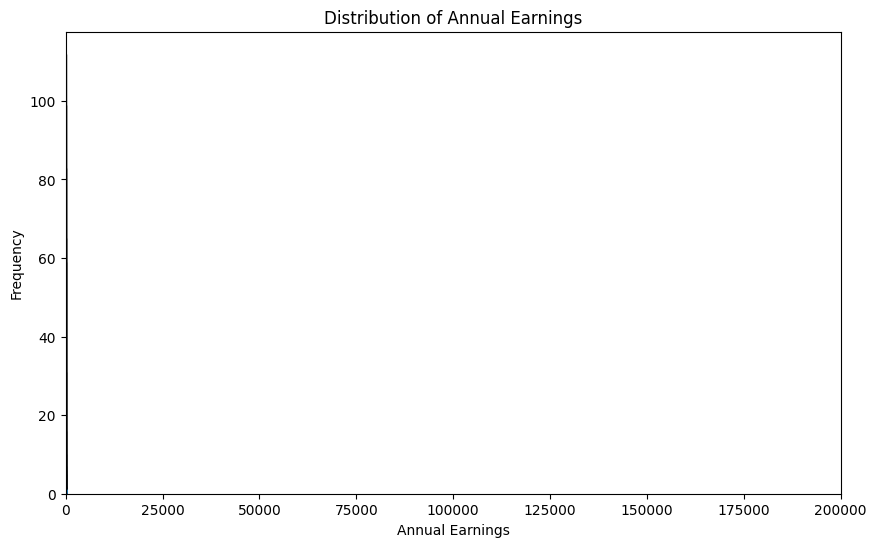

In [15]:
# Histogram of the 'earn' column
plt.figure(figsize=(10, 6))
sns.histplot(df['earn'], bins=30, kde=True)
plt.title('Distribution of Annual Earnings')
plt.xlabel('Annual Earnings')
plt.ylabel('Frequency')
plt.xlim(0, 200000)  # Limit x-axis for better visualization
plt.show()

# Oops! Nothing showed up. Why?
# Hint: Think about the range of earnings and the default x-axis limits of the plot.
# Solution: We can set the x-axis limits to focus on the main distribution and exclude extreme outliers.

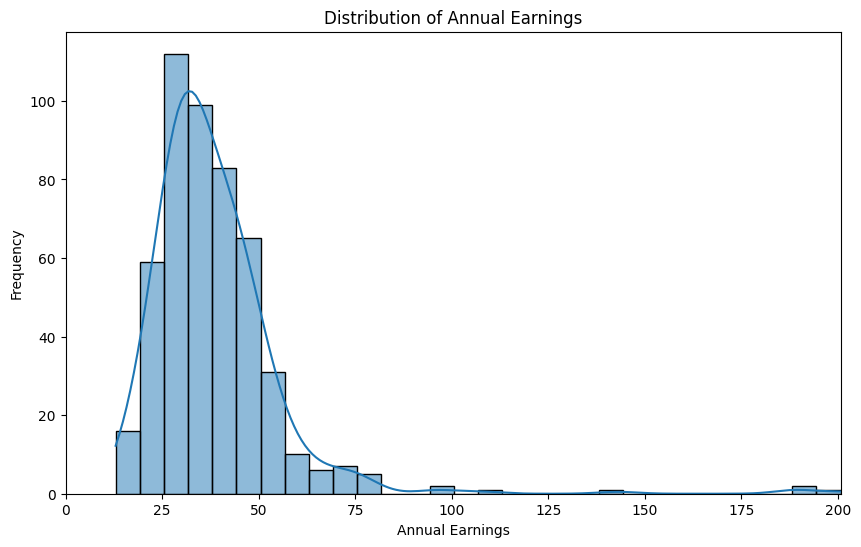

In [16]:
# Try running the histogram code again with the xlim line included.

plt.figure(figsize=(10, 6))
sns.histplot(df['earn'], bins=30, kde=True)
plt.title('Distribution of Annual Earnings')
plt.xlabel('Annual Earnings')
plt.ylabel('Frequency')
plt.xlim(0, max(df['earn']))  # Limit x-axis for better visualization
plt.show()

#### **Step 5: Visualizing Relationships via Scatterplots**

It makes intuitive sense to expect a positive relationship between schooling and earnings, let's try to visualize it.

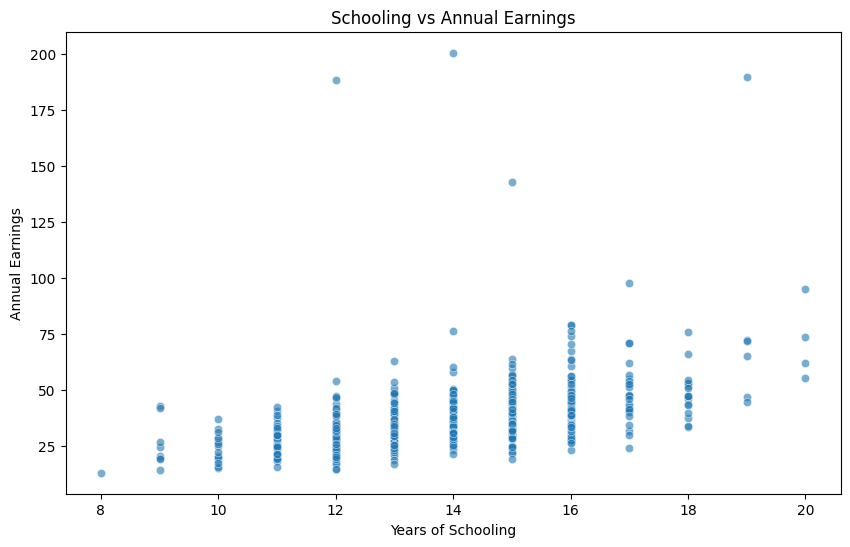

In [17]:
# Scatter plot of schooling vs earn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='schooling', y='earn', data=df, alpha=0.6)
plt.title('Schooling vs Annual Earnings')
plt.xlabel('Years of Schooling')
plt.ylabel('Annual Earnings')
plt.show()

#### **Step 4: Data Hygiene: Missing Values**
- Data is not always perfect. It is common to encounter, for example, **missing values**.
- Detecting and handling missing values is crucial for accurate analysis.

In [18]:
# Detcting missing values:
print("Missing values per column:")
print(df.isna().sum(), "\n")


Missing values per column:
earn          0
schooling     6
experience    0
dtype: int64 



In [19]:
# Handling missing values

# Here, we will demonstrate two common methods to handle missing values:
# a) Dropping rows with missing values
# b) Simple imputation (filling missing values with the median)

# a) Dropping rows with missing values
df_dropped = df.dropna(subset=['schooling'])
print("After dropping rows with missing 'schooling':")
print(df_dropped.isna().sum(), "\n")
print("Number of rows before:", len(df))
print("Number of rows after:", len(df_dropped), "\n")

# b) Simple imputation for 'schooling' using the median
df['schooling_imputed'] = df['schooling'].fillna(df['schooling'].median())
print("After imputing missing 'schooling' with median:")
print(df.isna().sum(), "\n")
print("Number of rows remains the same:", len(df))


After dropping rows with missing 'schooling':
earn          0
schooling     0
experience    0
dtype: int64 

Number of rows before: 500
Number of rows after: 494 

After imputing missing 'schooling' with median:
earn                 0
schooling            6
experience           0
schooling_imputed    0
dtype: int64 

Number of rows remains the same: 500


> **💡Note:**  
> It is important to think about **why data might be missing**.  
> - Is it **completely random**, or does it **follow a pattern**?  
> → This can **affect how you handle missing values** and the reliability of your analysis.

**For example:**
- If a few `schooling` values are missing **completely at random** (e.g., students forgot to answer the survey),

  → You might safely **fill them with the median** or **drop those rows**.

- But if `schooling` is **missing mostly for very high earners** who refused to report their education,  

  → Simply dropping or imputing values could **bias your results**, especially if you're studying the relationship between schooling and earnings.

Understanding **why** data is missing helps you choose the **right strategy**:

- **Drop** the missing rows if they are few and random.

- **Impute** when patterns are small but predictable.

- **Investigate deeper** if missingness is related to key outcomes — sometimes, more careful handling is needed.


> ⚠️ **Important Reminder**  
> Always be **transparent** about **how** you handle missing data **and why** you chose that approach.  
> Clearly document:
> - What method you used (e.g., drop, impute).
> - The reason for your choice.
> - The potential **impact** on your analysis and results.

<hr style="border: 1px dotted #bbb;">

### **Key Takeaways** ✅  

- Descriptive statistics are your first step in understanding data.

    - They provide insights into the data's structure, central tendencies, variability, and relationships between variables. 

    - Always start with descriptive statistics before diving into complex analyses.

- It is important to keep in mind that:

    - The above steps are iterative and **not strictly linear**. **You may need to revisit earlier steps as you uncover new insights or issues in the data.**
    
    - Also, there is **not only one way to do descriptive statistics.** Feel free to explore other methods and visualizations that suit your data and research questions!

---

## References & Acknowledgments

- This teaching material was prepared with the assistance of **OpenAI's ChatGPT (GPT-5)**.

- Cover Image: *Data Wrangling — From Messy to Clean* by **ChrisJen517**. Licensed under **CC BY-SA 4.0** (2020). Retrieved from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Data_Wrangling_From_Messy_To_Clean_Data_Management.jpg).

- Video Resource: *Asking and Answering Questions with Data through Plots* by [Prof. Bing Wen Brunton](https://www.biology.washington.edu/people/profile/bing-w-brunton). Retrieved from [YouTube](https://www.youtube.com/watch?v=b_TIPozKAcg).

---

## Extra reading (Optional)
For students who want to learn more about Python coding style and best practices, here is a useful resource:
- PEP8 - Style Guide for Python Code: [PEP 8](https://peps.python.org/pep-0008/)

Good writing practice is important for collaboration, code review, and future reference!

---

**End of lecture notebook.**